#### This jupyter notebook contains a sample code that represents my work on classification machine learning model to predict Labels

**caveat: the performance of the model given the dummy dataset is terrible. It was much better with a dataset for the problem that it meant to solve. This highlights the importance of the quality of data for machine learning.


This the Deep Learning neural network for multiclass classification. In order to improve the overall performance of the model, hyperparameter tuning was carried out and at the same time earlystopping and callback were used to prevent overfitting and minimise training time. One Cycle learning rate scheduler technique was also used to get as close to the global optimal as possible.  

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Dataset Preparation steps

In [2]:
# Create a dummy dataset of 100,000 rows in total that fit the problem
# Define the number of rows for each dataframe
num_rows = 100000

df = pd.DataFrame({
    'defect_1': np.random.randint(0, 2, size=num_rows),
    'defect_2': np.random.randint(0, 2, size=num_rows),
    'defect_3': np.random.randint(0, 2, size=num_rows),
    'defect_4': np.random.randint(0, 2, size=num_rows),
    'defect_5': np.random.randint(0, 2, size=num_rows),
    'defect_1_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_2_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_3_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_4_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_5_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'Reference': np.random.randint(0, 10, size=num_rows),
    'Lane': np.random.choice(['V1', 'V2'], size=num_rows),
    'TailleZone': np.random.randint(0, 100, size=num_rows),
    'Courbure': np.random.uniform(0, 1, size=num_rows),
    'CourbureVert': np.random.uniform(0, 1, size=num_rows),
    'Vitesse': np.random.uniform(0, 100, size=num_rows),
    'SensMarche': np.random.choice(['Forward', 'Backward'], size=num_rows),
    'Lat_acc_tete_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_Max': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'G_Mean': np.random.uniform(0, 1, size=num_rows),
    'AUC': np.random.uniform(0, 1, size=num_rows),
    'F-Measure': np.random.uniform(0, 1, size=num_rows),
    'Specificity': np.random.uniform(0, 1, size=num_rows),
    'Precision': np.random.uniform(0, 1, size=num_rows),
    'Recall': np.random.uniform(0, 1, size=num_rows),
    'TPR': np.random.uniform(0, 1, size=num_rows),
    'FPR': np.random.uniform(0, 1, size=num_rows),
    'TNR': np.random.uniform(0, 1, size=num_rows),
    'FNR': np.random.uniform(0, 1, size=num_rows),
    'Youden': np.random.uniform(0, 1, size=num_rows),
    'Balanced_Accuracy': np.random.uniform(0, 1, size=num_rows),
    'ROC_Curve': np.random.uniform(0, 1, size=num_rows),
    'PR_Curve': np.random.uniform(0, 1, size=num_rows),
    'AP': np.random.uniform(0, 1, size=num_rows)
})

# Display the DataFrame
df.head()

,defect_1,defect_2,defect_3,defect_4,defect_5,defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type,...,Recall,TPR,FPR,TNR,FNR,Youden,Balanced_Accuracy,ROC_Curve,PR_Curve,AP
0,1,0,0,1,0,C,D,D,C,A,...,0.072661,0.634846,0.115643,0.398134,0.059515,0.617526,0.010808,0.918326,0.287030,0.848672
1,1,0,0,0,0,B,A,A,A,A,...,0.883966,0.755261,0.967374,0.432881,0.448161,0.617098,0.358556,0.150785,0.284107,0.336113
2,1,0,0,0,1,B,A,B,A,A,...,0.616377,0.157210,0.635268,0.879132,0.050182,0.322761,0.656259,0.377684,0.441350,0.407003
3,0,1,0,0,1,A,C,A,A,A,...,0.898903,0.170384,0.872083,0.923067,0.658688,0.135539,0.033005,0.557535,0.706936,0.357118
4,1,1,0,0,1,B,C,B,A,C,...,0.128717,0.467506,0.548964,0.685815,0.757171,0.375626,0.139362,0.862527,0.617446,0.223739


In [3]:
# Remove unwanted columns
geo_param_to_remove = ['defect_1', 'defect_2', 'defect_3', 'defect_4', 'defect_5']
for col in df.columns.tolist():
    if 'PR' in col or 'NR' in col:
        geo_param_to_remove.append(col)

zone_info_to_remove = ['G_Mean', 'AUC', 'F-Measure', 'Specificity', 'Precision', 'Recall' 
                       , 'Youden', 'Balanced_Accuracy', 'ROC_Curve', 'PR_Curve', 'AP']

remove_list = geo_param_to_remove + zone_info_to_remove

In [4]:
df.drop(remove_list, axis=1, inplace=True)
print(df.columns.tolist())

['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type', 'Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg']


In [5]:
df.shape

(100000, 42)

In [6]:
# More columns and rows filtering can be done here, in the original data there are others
df["Lane"] = df.apply(lambda x: 'V1' if 'V1' in x["Lane"] else 'V2', axis=1)

In [7]:
# check for null values, in this case there isn't any because it's a dummy dataset
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [8]:
# Create a 'long_cat' column: 0 for without Niv or Nall, 1 for with only Niv, Nall, or Both, and 2 for Niv,Nall + others 
df["long_cat"] = df.apply(lambda x: 0 if 
                          x['defect_4_Type'] == 'A' and x['defect_5_Type'] == 'A'
                          else 1 if
                          (x['defect_1_Type'] != 'A' or x['defect_5_Type'] != 'A') and
                          x['defect_2_Type'] == 'A' and 
                          x['defect_3_Type'] == 'A'
                          else 2, axis=1)

In [9]:
#Create a new column that collects every defect types that exist in the zone which will be used for stratification
Defect_types = ['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
df["labels"] = df.apply(lambda x: ','.join(x[x.index.isin(Defect_types)].index
                                           [x[x.index.isin(Defect_types)] != 'A' ]), axis=1)

#### Split the df into final_test_set and global_train_set using defect combination

In [10]:
# Find row with a unique combination of types that only have one sample which will create problem during split
df["labels"].value_counts().loc[lambda x: x<2]

Series([], Name: labels, dtype: int64)

In [11]:
# Get the row that have unique combination (we will add them to the test set), before dropping them from the main df
unique_combination_ind = df["labels"].value_counts().loc[lambda x: x<2].index
unique_combination_df = df[df["labels"].isin(unique_combination_ind)]

#print(unique_combination_df)

# drop rows with unique_combination
#print("before drop: ", df.shape)
df = df.drop(df[df["labels"].isin(unique_combination_ind)].index).reset_index(drop=True)
#print("after drop: ", df.shape)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Defect_cat is 0 for without Niv or Nall, 1 for with Niv, Nall, or Both 
for train_index, test_index in split.split(df, df["labels"]):
    Global_train_set = df.loc[train_index]
    Final_test_set_original = df.loc[test_index]

In [14]:
# Add the unique combination rows to the Final_test_set
Final_test_set_original = pd.concat([Final_test_set_original, unique_combination_df], ignore_index=True)

Final_test_set_original["labels"].value_counts()

defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type    4719
defect_1_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1607
defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type                  1595
defect_1_Type,defect_2_Type,defect_3_Type,defect_5_Type                  1572
defect_1_Type,defect_2_Type,defect_4_Type,defect_5_Type                  1566
defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1560
defect_1_Type,defect_3_Type,defect_5_Type                                 549
defect_1_Type,defect_2_Type,defect_4_Type                                 538
defect_1_Type,defect_2_Type,defect_3_Type                                 535
defect_1_Type,defect_4_Type,defect_5_Type                                 531
defect_2_Type,defect_3_Type,defect_4_Type                                 530
defect_1_Type,defect_2_Type,defect_5_Type                                 530
defect_2_Type,defect_3_Type,defect_5_Type                       

In [15]:
# Drop the labels colmun from test and train sets
Global_train_set = Global_train_set.drop("labels", axis=1)
Final_test_set_original = Final_test_set_original.drop("labels", axis=1)

In [16]:
# Drop all '_type' columns and AB_tete and AC_tete
Global_train_set.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)

Final_test_set_original.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)

In [17]:
Global_train_set.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat
9405,7,V2,58,0.881104,0.527673,48.220777,Backward,0.033470,81.135083,79.572213,...,1.376675,20.211125,0.939444,0.602548,0.487120,15.429305,36.877844,0.864419,0.878651,2
10208,7,V1,13,0.403671,0.532949,60.970528,Backward,0.305302,6.165945,41.626500,...,62.127977,40.876672,0.832609,0.264256,0.927546,43.432629,33.818752,0.519203,0.030213,2
47254,7,V2,68,0.671967,0.769912,95.245923,Backward,0.327161,3.992533,25.744161,...,25.170132,18.210034,0.469598,0.943490,0.686136,18.317202,60.898217,0.734331,0.992658,2
22811,2,V2,86,0.049655,0.457658,31.134670,Forward,0.738360,68.491125,5.413170,...,51.056772,85.533911,0.429563,0.717762,0.651091,61.021200,92.340238,0.259048,0.016967,2
13790,5,V1,21,0.309491,0.195125,96.631197,Backward,0.773160,0.381197,27.266241,...,51.785907,1.383321,0.277815,0.768091,0.558751,52.700810,57.950195,0.164057,0.981256,2


#### End final test set split

# Classifier Multiclass training

In [18]:
df = Global_train_set.copy()

In [19]:
# Find if there is any column that is not numeric 
df_cat = df.select_dtypes(exclude=[np.number])
#df_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
other_cat_col = ['Reference']
df[other_cat_col] = df[other_cat_col].astype("category")
#df[other_cat_col].dtypes

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [21]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#print(df_cat_encoded)

df[df_cat.columns.tolist()] = df_cat_encoded
df[df_cat.columns.tolist()] = df[df_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

end of step 1.

### 2. Train/Val split (normal split here)

In [22]:
y_train = df["long_cat"]
X_train = df.drop("long_cat", axis=1)

In [23]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

end of step 2.

### 3. Data Visualisation on train set

### 4. Oversampling the train set

In [24]:
y_train.value_counts()

2    56411
0     4061
1     3528
Name: long_cat, dtype: int64

In [25]:
#We check the ratio of the labels
y_train.value_counts() / len(y_train)

2    0.881422
0    0.063453
1    0.055125
Name: long_cat, dtype: float64

If the size of class is too different, we can use oversampling below

In [26]:
from collections import Counter
counter = Counter(y_train)
print('Before oversampling', counter)

Before oversampling Counter({2: 56411, 0: 4061, 1: 3528})


In [27]:
oversampling = False

In [28]:
if oversampling:
    from imblearn.over_sampling import ADASYN
    ada = ADASYN(sampling_strategy='not majority', random_state = 42) # sampling_strategy = float only works for Binary 
    
    X_train_pre_transf, y_train_pre_transf = ada.fit_resample(X_train, y_train)
    counter = Counter(y_train_pre_transf)
    print('After', counter)
else:
    X_train_pre_transf = X_train
    y_train_pre_transf = y_train

In [29]:
#print(X_train_pre_transf[df_cat.columns.tolist()].value_counts())
X_train_pre_transf.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg
903,8,1.0,66,0.499106,0.244612,39.925707,0.0,0.291860,35.723838,85.499205,...,0.097648,16.837990,60.620811,0.599558,0.250094,0.894533,67.725041,34.905820,0.844467,0.031398
35842,4,1.0,20,0.725760,0.691894,44.674473,0.0,0.320000,21.778280,1.738820,...,0.006997,79.361037,13.579726,0.392136,0.347430,0.587862,1.490930,69.230094,0.188361,0.319472
38545,3,0.0,65,0.742265,0.838446,15.414567,0.0,0.484615,88.916865,92.594416,...,0.665293,9.354827,24.655410,0.563046,0.316150,0.316740,12.796499,88.944949,0.324153,0.168004
31251,2,0.0,19,0.294038,0.489740,45.589103,1.0,0.917617,78.658462,50.068398,...,0.600076,1.252158,8.669731,0.636126,0.166239,0.166691,99.187985,51.446011,0.264077,0.613679
38325,9,1.0,98,0.421437,0.061025,49.673856,1.0,0.496108,43.575751,87.937882,...,0.425411,98.457244,4.172702,0.411641,0.159732,0.154835,20.071033,34.334495,0.018326,0.043580


end of step 4.

### 5. Transformation

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

In [31]:
X_train_set = X_train_pre_transf.copy()

In [32]:
cat_attribs = X_train_set.select_dtypes(include='category').columns.tolist()
#print(cat_attribs)

X_train_num_lst = X_train_set.drop(cat_attribs, axis=1).columns.tolist()
X_train_cat_lst = X_train_set[cat_attribs].columns.tolist()

#print(X_train_num_lst)
#print(X_train_cat_lst)

In [33]:
# Create a transforamtion class to add, combine, fuse, extract features for the numeric PL
# stat_feature_head_to_tail is to use only the absolute 'ab_maximum' or 'average' value of each statistical feature from head, middle, or tail measurement (and None means to keep all of them)  
class Attrib_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, stat_feature_head_to_tail = 'ab_maximum'):
        self.stat_feature_head_to_tail = stat_feature_head_to_tail
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.stat_feature_head_to_tail is not None:
            stat_feature = ['Max', 'Max_Pos', 'Max_Pos_Moy', 'Avg', 'P2Avg']
            acc_measurement = ['Lat_acc', 'Vert_acc']
            
            new_X = X.copy() # so the original df is not changed
            # See the commnad line argument and match it to pre-defined case 
            match self.stat_feature_head_to_tail:
                case 'ab_maximum':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the absolute maximum value of each row, keep the sign, and put them in a new colmun 
                            row_max = X[all_location_list].abs().max(axis=1)
                            new_X[col_name] = X[all_location_list].max(axis=1).mask(lambda x: x < row_max, -row_max)
                            new_X = new_X.drop(all_location_list, axis=1)
                
                case 'average':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the mean value of each row and put them in a new colmun 
                            new_X[col_name] = X[all_location_list].mean(axis=1)
                            new_X = new_X.drop(all_location_list, axis=1)
                    
                case _:   # 'case _' is for any other input that does not match None or the above
                    sys.exit("please choose from 'ab_maximum', 'average', or \
                    'None' for stat_feature_head_to_tail in Attrib_transformer")
                
            #print(list(new_X.columns))
            return new_X
            
        else:
            return X


In [34]:
# Create a transforamtion class to drop unwanted features
class Attrib_drop(BaseEstimator, TransformerMixin):
    def __init__(self, d_list=[], keep_only_AV=False):
        self.d_list = d_list
        self.keep_only_AV = keep_only_AV
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.keep_only_AV:
            AV_indices = []
            for i, col in enumerate(X.columns):
                if 'AVB' in col or 'AVC' in col:
                    AV_indices.append(i)
            return X.iloc[:,AV_indices]
        elif self.d_list:
            keep_indices = []
            for i, col in enumerate(X.columns):
                if col not in self.d_list:
                    keep_indices.append(i)
            return X.iloc[:,keep_indices]
        else:
            return X

In [35]:
# List of the nulerical features to be dropped to manually drop columns from the df
drop_list_num = []

num_pl = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('attrib_transform', Attrib_transformer(stat_feature_head_to_tail='average')),
    ('attrib_drop', Attrib_drop(keep_only_AV=False, d_list=drop_list_num)),
    ('std_scaler', StandardScaler()),
])

#For testing num_pl
#num_prep = num_pl.fit_transform(X_train_set[X_train_num_lst])
#print('shape after transformation: ', num_prep.shape)
#num_prep

In [36]:
# List of the categorical features to be dropped to manually drop columns from the df
drop_list_cat = ['Lane']

cat_pl = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('attrib_drop', Attrib_drop(d_list=drop_list_cat)),
    ('One_Hot', OneHotEncoder(sparse=False)),
])

# For testing cat_pl
#cat_prep = cat_pl.fit_transform(X_train_set[X_train_cat_lst])
#cat_prep

In [37]:
full_pl = ColumnTransformer([
    ("num", num_pl, X_train_num_lst),
    ("cat", cat_pl, X_train_cat_lst),
])

X_train_prep = full_pl.fit_transform(X_train_set)

C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (64000, 26)


array([[ 5.65783127e-01, -3.46027708e-04, -8.80424390e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.02380928e+00,  7.83250226e-01,  6.63462673e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.31226771e-01,  8.40309981e-01,  1.16931983e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.56791747e+00, -6.26209289e-01, -1.17634256e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.53336111e+00,  4.56480846e-01,  1.39991367e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.36937284e+00,  6.57210545e-01,  1.66368397e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

#### 5.1 OPTIONAL: PCA for unsupervised feature selectiion

In [39]:
use_PCA = False

if use_PCA:
    from sklearn.decomposition import PCA
    pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
              svd_solver='auto', tol=0.0, whiten=False)
    
    X_train_prep = pca.fit_transform(X_train_prep)
    print('number of components: ', pca.n_components_)

In [40]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (64000, 26)


array([[ 5.65783127e-01, -3.46027708e-04, -8.80424390e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.02380928e+00,  7.83250226e-01,  6.63462673e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.31226771e-01,  8.40309981e-01,  1.16931983e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.56791747e+00, -6.26209289e-01, -1.17634256e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.53336111e+00,  4.56480846e-01,  1.39991367e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.36937284e+00,  6.57210545e-01,  1.66368397e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

#### 5.2 Transform X_val as well using the pipeline that has been fitted 

In [41]:
#Transform the X_test as the train set has been transformed
X_val_prep = full_pl.transform(X_val)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_val_prep = pca.transform(X_val_prep)
    print('number of components: ', pca.n_components_)

print('shape after transformation: ', X_val_prep.shape)

shape after transformation:  (16000, 26)


### 6. Train NN

In [42]:
import tensorflow as tf
from tensorflow import keras
from hyperopt import hp, tpe, fmin, STATUS_OK, Trials, space_eval
from hyperopt.early_stop import no_progress_loss
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

In [43]:
# Create a class for onecycle learning rate rescheduler
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [44]:
input_size = X_train_prep.shape[1]

In [45]:
def build_model(n_hidden, n_neurons, rho, dropout_rate, inputshape=input_size):
    """
    Function to build the neural network model based on the provided hyperparameters.
    
    Args:
        params (dict): Dictionary containing the hyperparameters.
        inputshape (int): Number of input features.
    
    Returns:
        model (Sequential): Compiled Keras model.
    """
    #print(n_hidden, n_neurons, rho, dropout_rate)
    
    model = keras.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal", input_shape=(inputshape,))
    ])

    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
        model.add(keras.layers.AlphaDropout(rate=dropout_rate))  # Add AlphaDropout layer with specified dropout rate

    model.add(keras.layers.Dense(3, activation="softmax"))
    optimizer = keras.optimizers.RMSprop(rho=rho)

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [46]:
def objective(params):
    """
    Objective function for hyperparameter optimization. Calculates the loss value (1 - accuracy) based on cross-validation.
    
    Args:
        params (dict): Dictionary containing the hyperparameters.
    
    Returns:
        dict: Dictionary containing the loss value, status, and cross-validation score.
    """ 
    mod_params = params.copy()
    mod_params.pop('max_lr')
    mod_params.pop('batch_size')
    n_epochs = 12
    model = build_model(**mod_params)
    
    #print("params['batch_size']: ", params['batch_size'])
    #print("params['max_lr']: ", params['max_lr'])
    print(params)
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3, 
                               restore_best_weights = False)  # Define early stopping callback
    
    onecycle = OneCycleScheduler(math.ceil(len(X_train) / params['batch_size']) * n_epochs, max_rate=params['max_lr'])
    
    model_file = "best_weights.h5" # File to save the best weights
    checkpoint = tf.keras.callbacks.ModelCheckpoint(model_file, monitor="val_loss", mode="min", 
                                                    save_best_only=True, verbose=1) # Define checkpoint to save best weights
    
    history = model.fit(X_train_prep, y_train_pre_transf, callbacks=[early_stop, checkpoint, onecycle], 
                        validation_data=(X_val_prep, y_val), epochs=n_epochs, batch_size=params['batch_size'], verbose=0)
    
    model.load_weights(model_file) # reload the best weights saved by checkpoint
    
    loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    
    return {'loss': val_loss, 'train_loss': loss, 'status': STATUS_OK, 'model': model, 'history': history} 
    # switch places of the loss varaible so that hyperopt select the best yperparameter based on val_loss instead of loss

In [47]:
search_space = {
    'n_hidden': hp.choice('n_hidden', [4, 9, 14]),  # Hyperparameter space for the number of hidden layers
    'n_neurons': hp.choice('n_neurons', [32, 64, 128]),  # Hyperparameter space for the number of neurons per layer
    'max_lr': hp.loguniform('max_lr', np.log(0.03), np.log(0.05)),  # Hyperparameter space for the max learning rate (1cycle)
    'rho': hp.loguniform('rho', np.log(0.7), np.log(0.99)),  # Hyperparameter space for the momentum
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.4),  # Hyperparameter space for the dropout rate
    'batch_size': hp.choice('batch_size', [32, 48, 64])  # Hyperparameter space for the batch size
}

trials = Trials()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=46, 
            early_stop_fn=no_progress_loss(4), trials=trials)

{'batch_size': 64, 'dropout_rate': 0.24839055845221328, 'max_lr': 0.039018057397411626, 'n_hidden': 9, 'n_neurons': 32, 'rho': 0.9573870675758572}
                                                                                                                       
Epoch 1: val_loss improved from inf to 0.55021, saving model to best_weights.h5

                                                                                                                       
Epoch 2: val_loss improved from 0.55021 to 0.51095, saving model to best_weights.h5

                                                                                                                       
Epoch 3: val_loss did not improve from 0.51095

                                                                                                                       
Epoch 4: val_loss did not improve from 0.51095

                                                                                                               

                                                                                                                       
Epoch 7: val_loss did not improve from 0.52139

                                                                                                                       
Epoch 8: val_loss did not improve from 0.52139

{'batch_size': 48, 'dropout_rate': 0.15142342612401463, 'max_lr': 0.04016455251752981, 'n_hidden': 9, 'n_neurons': 32, 'rho': 0.8884977961340516}
                                                                                                                       
Epoch 1: val_loss improved from inf to 0.50525, saving model to best_weights.h5

                                                                                                                       
Epoch 2: val_loss improved from 0.50525 to 0.49046, saving model to best_weights.h5

                                                                                                                

In [48]:
best_trial = trials.best_trial
best_params = best_trial["misc"]["vals"]
best_loss = best_trial["result"]["loss"]


print("Best Hyperparameters:", best_params)
print("Best Loss:", best_loss)

Best Hyperparameters: {'batch_size': [1], 'dropout_rate': [0.18704270486826874], 'max_lr': [0.03148565760792328], 'n_hidden': [0], 'n_neurons': [0], 'rho': [0.9383783578764477]}
Best Loss: 0.47409430146217346


In [49]:
final_best_params = space_eval(search_space, best)
final_best_params

{'batch_size': 48,
 'dropout_rate': 0.18704270486826874,
 'max_lr': 0.03148565760792328,
 'n_hidden': 4,
 'n_neurons': 32,
 'rho': 0.9383783578764477}

In [50]:
best_trial["result"]

{'loss': 0.47409430146217346,
 'train_loss': 0.4674908518791199,
 'status': 'ok',
 'model': <keras.engine.sequential.Sequential at 0x1f849606260>,
 'history': <keras.callbacks.History at 0x1f854486b90>}

In [51]:
best_trial["result"]['history'].history

{'loss': [0.4681738018989563,
  0.45710426568984985,
  0.4616430699825287,
  0.46793755888938904,
  1.5785553455352783,
  0.45847088098526,
  0.502875804901123,
  0.4674908518791199],
 'accuracy': [0.8752655982971191,
  0.8812812566757202,
  0.8814218640327454,
  0.8814218640327454,
  0.8753281235694885,
  0.8813281059265137,
  0.8812812566757202,
  0.8814218640327454],
 'val_loss': [0.5810679793357849,
  0.5441117882728577,
  0.5010806322097778,
  0.4711282551288605,
  0.46992096304893494,
  0.47864943742752075,
  0.476701021194458,
  0.47409430146217346],
 'val_accuracy': [0.874875009059906,
  0.874875009059906,
  0.874875009059906,
  0.874875009059906,
  0.874875009059906,
  0.874875009059906,
  0.874875009059906,
  0.874875009059906]}

In [52]:
n_epoch_best = np.argmax(best_trial["result"]['history'].history['val_accuracy']) + 1
n_epoch_best

1

In [53]:
mod_final_best_params = final_best_params.copy()
mod_final_best_params.pop('max_lr')
mod_final_best_params.pop('batch_size')
mod_final_best_params

{'dropout_rate': 0.18704270486826874,
 'n_hidden': 4,
 'n_neurons': 32,
 'rho': 0.9383783578764477}

In [54]:
# Train a model with the best hyperparameters
n_epochs=12

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3, 
                               restore_best_weights = False)  # Define early stopping callback
    
onecycle = OneCycleScheduler(math.ceil(len(X_train) / final_best_params['batch_size']) * n_epochs, 
                             max_rate=final_best_params['max_lr'])
    
best_model_file = "best_model_weights.h5" # File to save the best weights

checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_file, monitor="val_loss", mode="min", 
                                                    save_best_only=True, verbose=1) # Define checkpoint to save best weights


best_model_use_val = build_model(**mod_final_best_params)
history__use_val = best_model_use_val.fit(X_train_prep, y_train_pre_transf, epochs=n_epochs, batch_size=final_best_params['batch_size'], 
                         callbacks=[early_stop, checkpoint, onecycle], validation_data=(X_val_prep, y_val), verbose=1)

best_model_use_val.load_weights(best_model_file) # reload the best weights saved by checkpoint

Epoch 1/12
1326/1334 [============================>.] - ETA: 0s - loss: 0.4702 - accuracy: 0.8748
Epoch 1: val_loss improved from inf to 0.49489, saving model to best_model_weights.h5
1334/1334 [==============================] - 12s 6ms/step - loss: 0.4703 - accuracy: 0.8748 - val_loss: 0.4949 - val_accuracy: 0.8749
Epoch 2/12
1330/1334 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.8812
Epoch 2: val_loss improved from 0.49489 to 0.48859, saving model to best_model_weights.h5
1334/1334 [==============================] - 7s 5ms/step - loss: 0.4576 - accuracy: 0.8813 - val_loss: 0.4886 - val_accuracy: 0.8749
Epoch 3/12
1332/1334 [============================>.] - ETA: 0s - loss: 0.4615 - accuracy: 0.8813
Epoch 3: val_loss improved from 0.48859 to 0.47147, saving model to best_model_weights.h5
1334/1334 [==============================] - 7s 5ms/step - loss: 0.4614 - accuracy: 0.8814 - val_loss: 0.4715 - val_accuracy: 0.8749
Epoch 4/12
1330/1334 [==================

In [55]:
# Train another model with a full train set (train+val) using n_epoch_best instead of validation and early_stop

X_train_full = np.concatenate((X_train_prep, X_val_prep), axis=0)
y_train_full = np.concatenate((y_train_pre_transf, y_val), axis=0)

onecycle = OneCycleScheduler(math.ceil(len(X_train) / final_best_params['batch_size']) * n_epochs, 
                             max_rate=final_best_params['max_lr'])

best_model_epoch = build_model(**mod_final_best_params)
history_epoch = best_model_epoch.fit(X_train_prep, y_train_pre_transf, epochs=n_epoch_best, 
                                     batch_size=final_best_params['batch_size'], callbacks=[onecycle], verbose=1)

1334/1334 [==============================] - 10s 4ms/step - loss: 0.4686 - accuracy: 0.8752


In [56]:
# Use model saved from hyperopt direcly

best_model_saved = best_trial["result"]['model']

# Final evalution using Final_test_set

### 1. Prepare Final_test_set

In [57]:
Final_test_set = Final_test_set_original.copy()

In [58]:
Final_test_set.tail(15)

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat
19985,4,V2,97,0.248856,0.811299,74.571267,Forward,0.752781,93.585508,54.424371,...,22.987785,7.141788,0.589260,0.007383,0.230361,67.410379,86.348173,0.181084,0.946456,2
19986,3,V1,17,0.505766,0.014886,37.428501,Backward,0.836663,14.892470,12.683041,...,56.374095,83.546111,0.844365,0.490782,0.582472,66.954615,26.670707,0.388776,0.111867,2
19987,7,V1,44,0.523861,0.798937,1.847553,Backward,0.334562,97.347031,60.977658,...,75.836442,60.095216,0.363194,0.023944,0.030404,48.961864,31.945800,0.963232,0.444202,2
19988,9,V2,43,0.206711,0.566057,44.418406,Forward,0.734586,39.680662,91.292757,...,86.520653,89.771954,0.637351,0.659116,0.325615,36.350467,44.709167,0.080363,0.320863,2
19989,8,V2,69,0.270948,0.002880,77.905207,Backward,0.535146,49.318462,1.634149,...,94.614352,68.889789,0.271212,0.096657,0.462147,61.944299,64.052392,0.034402,0.829404,2
19990,2,V1,85,0.096822,0.933810,93.600719,Forward,0.828022,23.384283,17.759940,...,47.923994,34.593595,0.192235,0.695820,0.911089,48.549142,74.058173,0.238302,0.689883,1
19991,1,V2,90,0.649466,0.899831,13.573825,Backward,0.369352,71.956242,41.975837,...,67.514767,4.051355,0.258579,0.914593,0.269741,49.498160,6.709154,0.782068,0.323404,2
19992,0,V2,46,0.255543,0.056493,62.808265,Forward,0.779608,57.339122,85.740536,...,38.199478,65.322573,0.136757,0.564691,0.645442,13.527891,48.211922,0.201073,0.488778,2
19993,1,V2,22,0.788189,0.330568,73.326768,Forward,0.022644,84.787100,47.242534,...,31.184726,32.213175,0.393806,0.625484,0.697336,60.673910,31.408992,0.290108,0.499644,2
19994,3,V1,5,0.221636,0.605395,61.802903,Backward,0.990956,32.714374,0.241393,...,33.350917,55.998403,0.893564,0.474300,0.558117,60.549575,59.781571,0.080486,0.140001,2


### 2. Make prediction with the classifier

In [59]:
# Find if there is any column that is not numeric 
Final_test_set_cat = Final_test_set.select_dtypes(exclude=[np.number])
#Final_test_set_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
Final_test_set[other_cat_col] = Final_test_set[other_cat_col].astype("category")
#Final_test_set[other_cat_col].dtypes

In [60]:
Final_test_set_cat_encoded = ordinal_encoder.fit_transform(Final_test_set_cat)
#print(Final_test_set_cat_encoded)

Final_test_set[Final_test_set_cat.columns.tolist()] = Final_test_set_cat_encoded
Final_test_set[Final_test_set_cat.columns.tolist()] = Final_test_set[Final_test_set_cat.columns.tolist()].astype("category")
#Final_test_set[Final_test_set_cat.columns.tolist()].value_counts()

In [61]:
Final_test = Final_test_set.copy()

In [62]:
Final_test["long_cat"].value_counts()

2    17602
0     1275
1     1123
Name: long_cat, dtype: int64

In [63]:
X_Final_test = Final_test.drop("long_cat", axis=1)
y_Final_test = Final_test["long_cat"]

In [64]:
#Transform the X_test as the train set has been transformed
X_Final_test_prep = full_pl.transform(X_Final_test)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_Final_test_prep = pca.transform(X_Final_test_prep)
    print('number of components: ', pca.n_components_)

print('shape after transformation: ', X_Final_test_prep.shape)

shape after transformation:  (20000, 26)


In [65]:
# Use 3 models to make prediction

y_pred_use_val_prob = best_model_use_val.predict(X_Final_test_prep) # use own validation
y_pred_epoch_prob = best_model_epoch.predict(X_Final_test_prep) # use known best n_epochs
y_pred_saved_prob = best_model_saved.predict(X_Final_test_prep) # use the saved model

625/625 [==============================] - 2s 2ms/step


In [66]:
def convert_probabilities_to_labels(predictions):
    labels = np.argmax(predictions, axis=1)
    return labels

In [67]:
y_pred_use_val_label = convert_probabilities_to_labels(y_pred_use_val_prob)
y_pred_epoch_label = convert_probabilities_to_labels(y_pred_epoch_prob)
y_pred_saved_label = convert_probabilities_to_labels(y_pred_saved_prob)

### 3. Evaluate the model with test set

In [68]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

In [69]:
def perf_evaluate_plot(y_test, y_pred, n_class = 2):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Define class names
    if n_class == 2:
        classes = ['Class 0', 'Class 1']
    elif n_class == 3:
        classes = ['Class 0', 'Class 1', 'Class 2']
    else:
        sys.exit("n_class can only be 2 or 3")
    
    # Define plot parameters
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=classes, yticklabels=classes, annot_kws={"fontsize":16})
    
    # Set plot labels
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    # Create classification report
    print(classification_report(y_test, y_pred))
    print("====================================================================================")

Own validation net performance evaluation


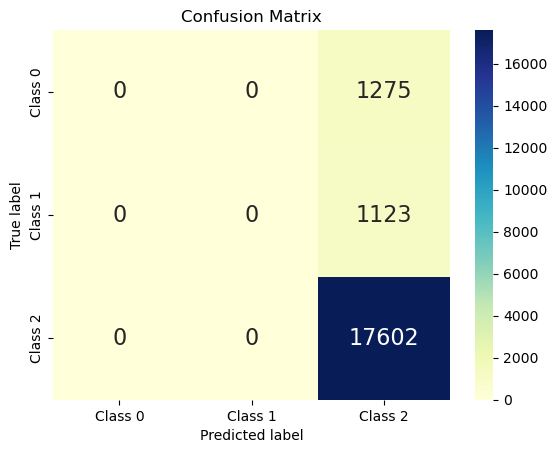

C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1275
           1       0.00      0.00      0.00      1123
           2       0.88      1.00      0.94     17602

    accuracy                           0.88     20000
   macro avg       0.29      0.33      0.31     20000
weighted avg       0.77      0.88      0.82     20000

n_epoch Model net performance evaluation


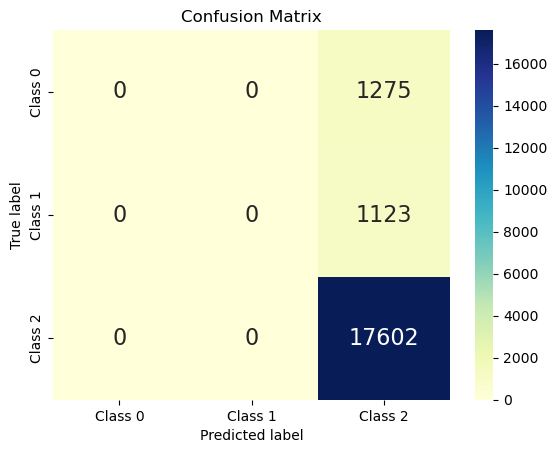

C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1275
           1       0.00      0.00      0.00      1123
           2       0.88      1.00      0.94     17602

    accuracy                           0.88     20000
   macro avg       0.29      0.33      0.31     20000
weighted avg       0.77      0.88      0.82     20000

Saved Model performance evaluation


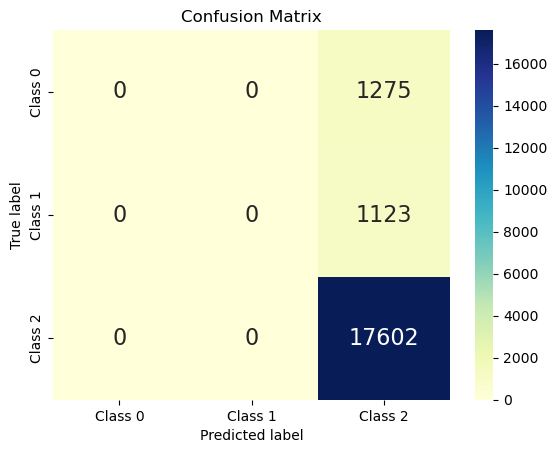

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1275
           1       0.00      0.00      0.00      1123
           2       0.88      1.00      0.94     17602

    accuracy                           0.88     20000
   macro avg       0.29      0.33      0.31     20000
weighted avg       0.77      0.88      0.82     20000



C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# use_val performance
print("Own validation net performance evaluation")
perf_evaluate_plot(Final_test["long_cat"], y_pred_use_val_label, n_class=3)

# best n_epoch performance
print("n_epoch Model net performance evaluation")
perf_evaluate_plot(Final_test["long_cat"], y_pred_epoch_label, n_class=3)

# Saved model performance
print("Saved Model performance evaluation")
perf_evaluate_plot(Final_test["long_cat"], y_pred_saved_label, n_class=3)

#### Final words

Once again, the result is horrible to say the least. It was much better with the actual dataset for the problem that this model was built to solve - this was actually the best model out of the three. The main reason is the proportion of label 2 was very small in this randomly generated dataset, especially when oversampling was not used. It is another salute to the says the importance of the quality of data, and in this case also the size of data, for machine learning tasks.

Anyways, the idea of this notebook is to demonstrate how to use deep learning neural network to perform classification problem when the model has two-level architecture. It is possible to compare the performance of the classifier of each level to the global performance to observe the performance drop caused by error propagation.